<a href="https://colab.research.google.com/github/Tdavies92/AcademyPublic/blob/main/FPL%20(basic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import numpy as np

In [37]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
url_user = 'https://fantasy.premierleague.com/api/my-team/3994818/'

In [38]:
#use the requests package to make a GET request from the API endpoint:

r = requests.get(url)
r_user = requests.get(url_user)

In [39]:
#transform that request into a json object
json = r.json()
json_user = r_user.json()

In [ ]:
#output the keys from the data set
json.keys()


In [40]:
json_user.keys()

dict_keys(['detail'])

In [32]:
json_user.keys()

dict_keys(['id', 'joined_time', 'started_event', 'favourite_team', 'player_first_name', 'player_last_name', 'player_region_id', 'player_region_name', 'player_region_iso_code_short', 'player_region_iso_code_long', 'summary_overall_points', 'summary_overall_rank', 'summary_event_points', 'summary_event_rank', 'current_event', 'leagues', 'name', 'name_change_blocked', 'kit', 'last_deadline_bank', 'last_deadline_value', 'last_deadline_total_transfers'])

In [6]:
#build three sub-datasets from the main data set
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [7]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,80201,0,0,-4,4,0,1,1.0,-0.5,0,Bernd,0.0,1,False,,None,46,80201.jpg,1.3,Leno,1.0,False,None,a,1,3,4,59158,290,170389,1268,0.0,0.9,Leno,270,0,0,0,9,0,0,0,0,0,9,0,48,79.0,0.0,0.0,7.9,269,24,571,59,559,54,344,24,NaN,,NaN,,NaN,
1,0.0,0.0,115918,0,0,0,0,0,1,0.0,0.0,0,Rúnar Alex,0.0,2,False,Joined OH Leuven on a season-long loan - Expec...,2021-08-31T22:00:09.069158Z,40,115918.jpg,0.0,Rúnarsson,0.7,False,None,u,1,3,0,19017,0,63655,639,0.0,0.0,Rúnarsson,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,448,41,431,21,395,14,451,41,NaN,,NaN,,NaN,
2,0.0,0.0,47431,0,0,-2,2,0,3,0.0,0.0,0,Willian,0.0,3,False,Transferred to Corinthians,2021-08-20T09:30:14.065783Z,63,47431.jpg,0.0,Borges Da Silva,0.1,False,None,u,1,3,0,914,0,20150,32,0.0,0.0,Willian,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,626,257,625,257,625,257,626,257,NaN,,NaN,,NaN,
3,100.0,75.0,54694,-1,1,-1,1,0,4,2.0,0.4,2,Pierre-Emerick,1.0,4,False,,2021-11-19T16:30:08.907928Z,99,54694.jpg,3.6,Aubameyang,4.2,False,None,a,1,3,40,659724,16112,552214,25427,0.1,4.0,Aubameyang,878,4,1,5,12,0,0,2,2,0,0,7,134,205.0,124.2,460.0,78.9,84,11,106,17,6,3,28,9,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,-3,3,0,2,1.0,-0.5,0,Cédric,0.0,5,False,,None,42,58822.jpg,0.3,Soares,0.2,False,None,a,1,3,1,11219,136,21865,306,0.0,0.2,Cédric,188,0,0,0,7,0,0,0,1,0,0,0,21,30.8,36.1,1.0,6.8,343,129,252,72,376,137,357,124,NaN,,NaN,,NaN,


In [8]:
#display all of the player features
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [9]:
#keep only features required
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points', 'bonus']]
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus
0,Leno,1,1,1.0,46,270,59158,0.9,4,0
1,Rúnarsson,1,1,0.7,40,0,19017,0.0,0,0
2,Borges Da Silva,1,3,0.1,63,0,914,0.0,0,0
3,Aubameyang,1,4,4.2,99,878,659724,4.0,40,7
4,Soares,1,2,0.2,42,188,11219,0.2,1,0


In [10]:
elements_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],72
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],213
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],260
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],86


In [11]:
#bring in 'singular_name' from the elements_types table to the slim_elements_df table
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position
0,Leno,1,1,1.0,46,270,59158,0.9,4,0,Goalkeeper
1,Rúnarsson,1,1,0.7,40,0,19017,0.0,0,0,Goalkeeper
2,Borges Da Silva,1,3,0.1,63,0,914,0.0,0,0,Midfielder
3,Aubameyang,1,4,4.2,99,878,659724,4.0,40,7,Forward
4,Soares,1,2,0.2,42,188,11219,0.2,1,0,Defender


In [13]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1190,1250,1110,1140,1110,1170,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1160,1110,1120,1130,1160,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,3,None,False,0,1070,1080,1130,1160,1100,1150,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,3,None,False,0,1140,1140,1160,1190,1090,1130,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,2,None,False,0,1040,1050,1040,1070,1060,1100,43


In [14]:
#bring in the team name
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position
0,Leno,Arsenal,1,1.0,46,270,59158,0.9,4,0,Goalkeeper
1,Rúnarsson,Arsenal,1,0.7,40,0,19017,0.0,0,0,Goalkeeper
2,Borges Da Silva,Arsenal,3,0.1,63,0,914,0.0,0,0,Midfielder
3,Aubameyang,Arsenal,4,4.2,99,878,659724,4.0,40,7,Forward
4,Soares,Arsenal,2,0.2,42,188,11219,0.2,1,0,Defender


In [16]:
#convert all value_season entries to float
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
#sort the dataframe by decending value
slim_elements_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position,value
187,James,Chelsea,2,27.7,61,549,2568378,12.3,75,13,Defender,12.3
367,Cancelo,Man City,2,32.7,66,1067,2591094,12.0,79,12,Defender,12.0
173,Rüdiger,Chelsea,2,18.3,59,990,2011915,11.4,67,4,Defender,11.4
195,Gallagher,Crystal Palace,3,24.5,60,955,2485301,11.2,67,9,Midfielder,11.2
494,Livramento,Southampton,2,23.2,46,1075,2173488,10.7,49,2,Defender,10.7
477,McCarthy,Southampton,1,5.3,46,1080,428680,10.4,48,3,Goalkeeper,10.4
190,Chalobah,Chelsea,2,4.3,48,543,643579,10.4,50,5,Defender,10.4
561,Dennis,Watford,4,9.8,53,828,1749963,10.2,54,8,Forward,10.2
341,Alexander-Arnold,Liverpool,2,34.1,78,873,2126079,10.1,79,15,Defender,10.1
19,Smith Rowe,Arsenal,3,24.9,59,979,2190361,10.0,59,6,Midfielder,10.0


In [19]:
#remove all values where there was no score
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [20]:
#position analysis
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,5.706667
0,Defender,4.487500
3,Midfielder,3.685714
1,Forward,3.372581


In [21]:
#team value analysis
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
18,West Ham,5.450000
5,Chelsea,5.364000
6,Crystal Palace,5.357895
19,Wolves,5.072222
10,Liverpool,4.520000
11,Man City,4.486957
15,Southampton,4.419048
2,Brentford,4.359091
3,Brighton,4.240909
4,Burnley,4.183333


In [22]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

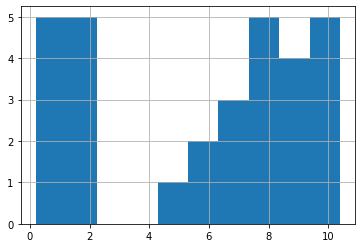

In [23]:
goal_df.value.hist()

In [24]:
#Top GK's
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position,value
477,McCarthy,Southampton,1,5.3,46,1080,428680,10.4,48,3,Goalkeeper,10.4
196,Guaita,Crystal Palace,1,8.3,46,1080,542639,10.0,46,3,Goalkeeper,10.0
33,Ramsdale,Arsenal,1,11.7,48,810,1064232,9.8,47,5,Goalkeeper,9.8
623,Malheiro de Sá,Wolves,1,2.5,50,1080,350751,9.6,48,4,Goalkeeper,9.6
188,Mendy,Chelsea,1,20.0,63,990,1176077,9.4,59,3,Goalkeeper,9.4
502,Lloris,Spurs,1,8.6,54,1080,815379,9.3,50,6,Goalkeeper,9.3
38,Martínez,Aston Villa,1,14.4,55,990,342651,9.1,50,7,Goalkeeper,9.1
390,de Gea,Man Utd,1,5.4,50,1080,522106,9.0,45,2,Goalkeeper,9.0
335,Ramses Becker,Liverpool,1,7.8,60,990,467491,8.5,51,5,Goalkeeper,8.5
368,Santana de Moraes,Man City,1,9.1,60,990,405126,8.2,49,2,Goalkeeper,8.2


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,position,value
187,James,Chelsea,2,27.7,61,549,2568378,12.3,75,13,Defender,12.3
367,Cancelo,Man City,2,32.7,66,1067,2591094,12.0,79,12,Defender,12.0
173,Rüdiger,Chelsea,2,18.3,59,990,2011915,11.4,67,4,Defender,11.4
494,Livramento,Southampton,2,23.2,46,1075,2173488,10.7,49,2,Defender,10.7
190,Chalobah,Chelsea,2,4.3,48,543,643579,10.4,50,5,Defender,10.4
341,Alexander-Arnold,Liverpool,2,34.1,78,873,2126079,10.1,79,15,Defender,10.1
105,Duffy,Brighton,2,22.7,43,990,2321685,10.0,43,3,Defender,10.0
76,Henry,Brentford,2,1.5,45,1042,161526,10.0,45,3,Defender,10.0
518,Reguilón,Spurs,2,11.3,51,951,1406091,9.8,50,5,Defender,9.8
231,Keane,Everton,2,2.7,50,1080,208845,9.6,48,6,Defender,9.6


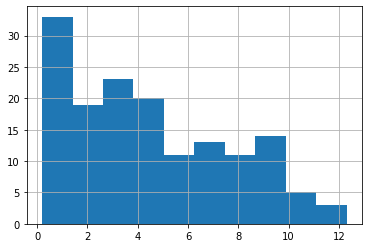

In [26]:
#Defender Analysis
def_df.value.hist()
def_df.sort_values('value',ascending=False).head(10)